# Desafio Técnico - Cientista de Dados Júnior

### Desenvolvido por: Fernanda Paula Rocha

## Descrição

Apresentei soluções para as questões do processo e incluí mais algumas para explorar melhor o dataset. Este é o desafio técnico para a vaga de Cientista de Dados Júnior no Escritório Municipal de Dados do Rio de Janeiro. Tem como  objetivo avaliar minhas habilidades em manipulação, consulta e análise de dados, assim como visualização usando ferramentas como BigQuery e Python.

## Objetivo
O objetivo deste desafio é realizar análises exploratórias em conjuntos de dados públicos disponíveis no BigQuery, responder a perguntas específicas sobre esses dados utilizando SQL e Python, e criar visualizações informativas e visualmente atraentes.


## Conjunto de Dados
Os conjuntos de dados que serão utilizados neste desafio são:

Chamados do 1746: Dados relacionados a chamados de serviços públicos na cidade do Rio de Janeiro. O caminho da tabela é : ``datario.administracao_servicos_publicos.chamado_1746``

Bairros do Rio de Janeiro: Dados sobre os bairros da cidade do Rio de Janeiro - RJ. O caminho da tabela é: ``atario.dados_mestres.bairro``

Ocupação Hoteleira em Grandes Eventos no Rio: Dados contendo o período de duração de alguns grandes eventos que ocorreram no Rio de Janeiro em 2022 e 2023 e a taxa de ocupação hoteleira da cidade nesses períodos. O caminho da tabela é: ``datario.turismo_fluxo_visitantes.rede_hoteleira_ocupacao_eventos``

# ------------------------------------------------------------------
# Carregamento dos Dados
# ------------------------------------------------------------------

In [1]:
!pip install basedosdados

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.2/135.2 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.9/70.9 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━

In [29]:
# --------------------------------------------------------------
# Importação de Bibliotecas
# --------------------------------------------------------------

import basedosdados as bd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
print("Versões das bibliotecas utilizadas:")
print("Pandas:", pd.__version__)
print("Matplotlib:", plt.matplotlib.__version__)
print("Seaborn:", sns.__version__)
print("Base dos dados:", bd.__version__)


Versões das bibliotecas utilizadas:
Pandas: 1.5.3
Matplotlib: 3.7.1
Seaborn: 0.13.1
Base dos dados: 1.6.11


In [3]:
consulta_eventos = "SELECT * FROM `datario.turismo_fluxo_visitantes.rede_hoteleira_ocupacao_eventos`"
df_eventos_ori = bd.read_sql(consulta_eventos, billing_project_id="desafio-rio-de-janeiro")

consulta_chamados_2022_2024 = "SELECT * FROM `datario.administracao_servicos_publicos.chamado_1746` WHERE DATE(data_inicio) >= DATE('2022-01-01') AND DATE(data_inicio) <= DATE('2024-01-01')"
df_chamados_2022_2024_ori = bd.read_sql(consulta_chamados_2022_2024, billing_project_id="desafio-rio-de-janeiro")


consulta_bairros = "SELECT * FROM `datario.dados_mestres.bairro`"
df_bairros_ori = bd.read_sql(consulta_bairros, billing_project_id="desafio-rio-de-janeiro")



Downloading: 100%|██████████| 164/164 [00:09<00:00, 17.57rows/s]


In [4]:
df_eventos = df_eventos_ori.copy()
df_chamados_2022_2024 = df_chamados_2022_2024_ori.copy()
df_bairros = df_bairros_ori.copy()

## (Questão 1) Quantos chamados foram abertos no dia 01/04/2023?

In [32]:
df_chamados_2022_2024['data_inicio'] = pd.to_datetime(df_chamados_2022_2024['data_inicio'])

chamados_01_04_2023 = df_chamados_2022_2024[df_chamados_2022_2024['data_inicio'].dt.date == pd.to_datetime('2023-04-01').date()]

total_chamados_abertos = chamados_01_04_2023.shape[0]

print(f"Quantidade de chamados abertos em 01/04/2023: {total_chamados_abertos}")

Quantidade de chamados abertos em 01/04/2023: 73


## (Questão 2) Qual o tipo de chamado que teve mais reclamações no dia 01/04/2023?

In [33]:
total_reclamacoes_por_tipo = chamados_01_04_2023.groupby('tipo').size().reset_index(name='total_reclamacoes')

tipo_mais_reclamacoes = total_reclamacoes_por_tipo.loc[total_reclamacoes_por_tipo['total_reclamacoes'].idxmax()]

print(f"Tipo com mais reclamações em 01/04/2023: {tipo_mais_reclamacoes['tipo']} com {tipo_mais_reclamacoes['total_reclamacoes']} reclamações.")


Tipo com mais reclamações em 01/04/2023: Poluição sonora com 24 reclamações.


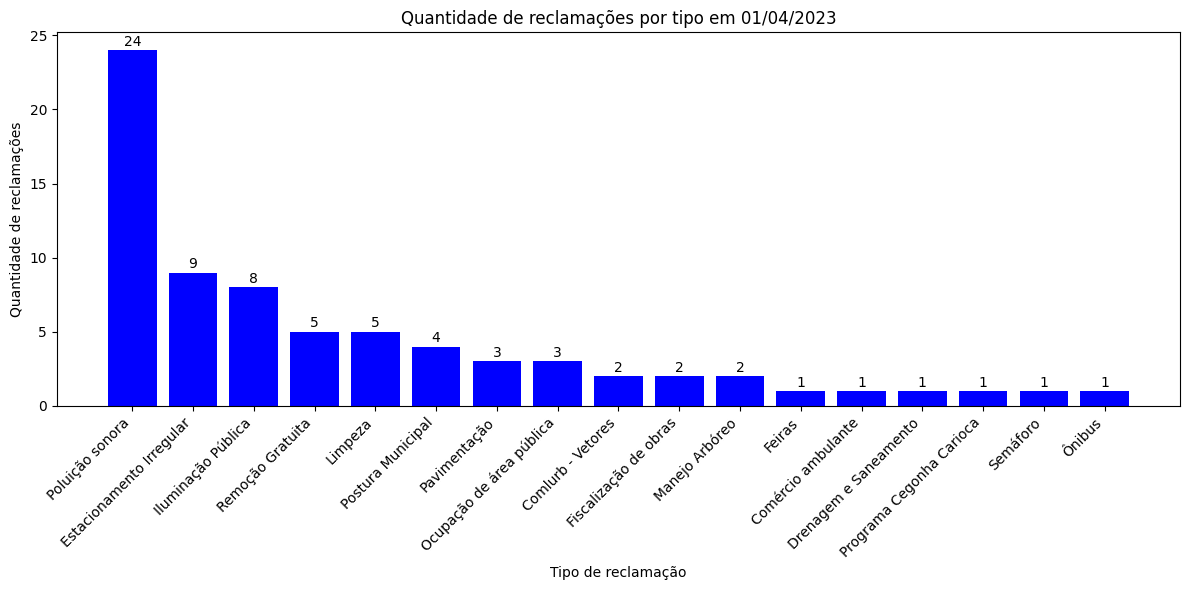

In [34]:
total_reclamacoes_por_tipo = total_reclamacoes_por_tipo.sort_values(by='total_reclamacoes', ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(total_reclamacoes_por_tipo['tipo'], total_reclamacoes_por_tipo['total_reclamacoes'], color='blue')
plt.xlabel('Tipo de reclamação')
plt.ylabel('Quantidade de reclamações')
plt.title('Quantidade de reclamações por tipo em 01/04/2023')

for i, value in enumerate(total_reclamacoes_por_tipo['total_reclamacoes']):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## (Questão 3) Quais os nomes dos 3 bairros que mais tiveram chamados abertos nesse dia?

In [35]:
df_combinado = pd.merge(chamados_01_04_2023, df_bairros, how='inner', left_on='id_bairro', right_on='id_bairro')

total_chamados_por_bairro = df_combinado.groupby('nome')['id_bairro'].count().reset_index(name='total_chamados_abertos')

top_3_bairros = total_chamados_por_bairro.sort_values(by='total_chamados_abertos', ascending=False).head(3)

print(top_3_bairros[['nome', 'total_chamados_abertos']])

                 nome  total_chamados_abertos
10  Engenho de Dentro                       8
3        Campo Grande                       6
20             Leblon                       6


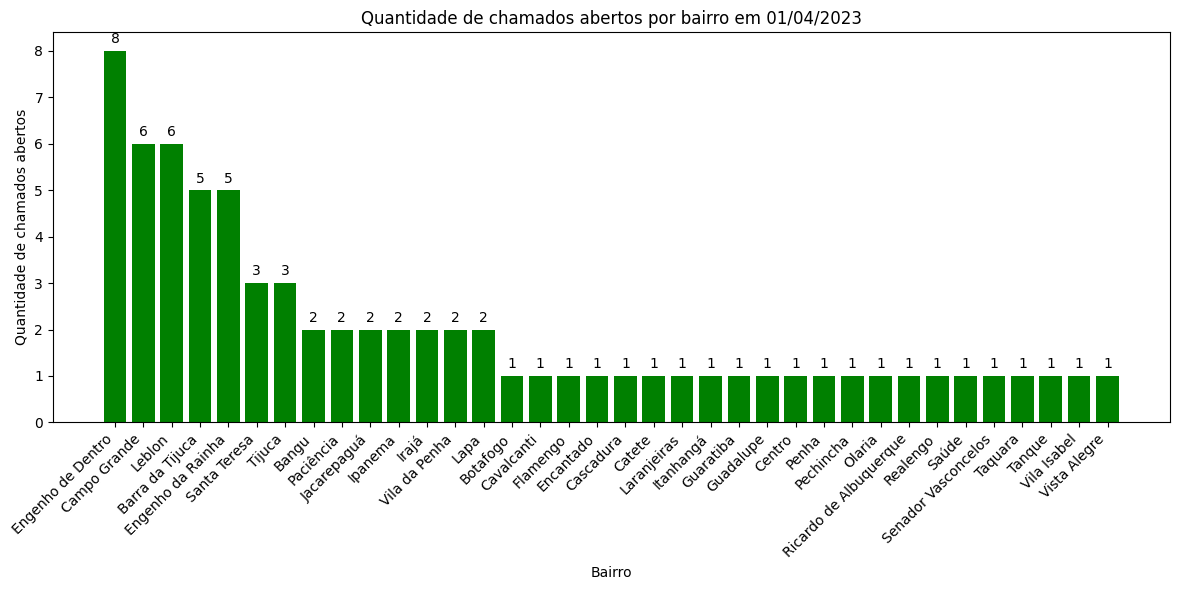

In [36]:
total_chamados_por_bairro = total_chamados_por_bairro.sort_values(by='total_chamados_abertos', ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(total_chamados_por_bairro['nome'], total_chamados_por_bairro['total_chamados_abertos'], color='green')
plt.xlabel('Bairro')
plt.ylabel('Quantidade de chamados abertos')
plt.title('Quantidade de chamados abertos por bairro em 01/04/2023')

for i, value in enumerate(total_chamados_por_bairro['total_chamados_abertos']):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## (Questão 3.1) Quais os tipos de chamados para cada bairro nesse dia?

In [37]:
df_combinado = pd.merge(chamados_01_04_2023, df_bairros, how='inner', left_on='id_bairro', right_on='id_bairro')

total_chamados_por_tipo_bairro = df_combinado.groupby(['nome', 'tipo']).size().reset_index(name='total_chamados')

print(total_chamados_por_tipo_bairro[['nome', 'tipo', 'total_chamados']])


                      nome                      tipo  total_chamados
0                    Bangu  Ocupação de área pública               1
1                    Bangu                  Semáforo               1
2          Barra da Tijuca  Estacionamento Irregular               3
3          Barra da Tijuca           Poluição sonora               2
4                 Botafogo           Poluição sonora               1
5             Campo Grande  Estacionamento Irregular               1
6             Campo Grande        Iluminação Pública               1
7             Campo Grande                   Limpeza               1
8             Campo Grande            Manejo Arbóreo               1
9             Campo Grande  Ocupação de área pública               1
10            Campo Grande           Poluição sonora               1
11               Cascadura          Remoção Gratuita               1
12                  Catete           Poluição sonora               1
13              Cavalcanti        

## (Questão 3.2) Qual o tipo de chamado mais frequente para cada bairro nesse dia?

In [38]:
df_combinado = pd.merge(chamados_01_04_2023, df_bairros, how='inner', left_on='id_bairro', right_on='id_bairro')

total_chamados_por_tipo_bairro = df_combinado.groupby(['nome', 'tipo']).size().reset_index(name='total_chamados')

idx = total_chamados_por_tipo_bairro.groupby(['nome'])['total_chamados'].transform(max) == total_chamados_por_tipo_bairro['total_chamados']
tipos_mais_frequentes_por_bairro = total_chamados_por_tipo_bairro[idx]

print(tipos_mais_frequentes_por_bairro[['nome', 'tipo', 'total_chamados']])

                      nome                      tipo  total_chamados
0                    Bangu  Ocupação de área pública               1
1                    Bangu                  Semáforo               1
2          Barra da Tijuca  Estacionamento Irregular               3
4                 Botafogo           Poluição sonora               1
5             Campo Grande  Estacionamento Irregular               1
6             Campo Grande        Iluminação Pública               1
7             Campo Grande                   Limpeza               1
8             Campo Grande            Manejo Arbóreo               1
9             Campo Grande  Ocupação de área pública               1
10            Campo Grande           Poluição sonora               1
11               Cascadura          Remoção Gratuita               1
12                  Catete           Poluição sonora               1
13              Cavalcanti              Pavimentação               1
14                  Centro        

##  (Questão 4) Qual o nome da subprefeitura com mais chamados abertos nesse dia?

In [39]:
df_combinado = pd.merge(chamados_01_04_2023, df_bairros, how='inner', left_on='id_bairro', right_on='id_bairro')

total_chamados_por_subprefeitura = df_combinado.groupby('subprefeitura')['id_bairro'].count().reset_index(name='total_chamados')

subprefeitura_mais_chamados = total_chamados_por_subprefeitura.loc[total_chamados_por_subprefeitura['total_chamados'].idxmax()]

print(f"Subprefeitura com mais chamados em 01/04/2023: {subprefeitura_mais_chamados['subprefeitura']} com {subprefeitura_mais_chamados['total_chamados']} chamados.")


Subprefeitura com mais chamados em 01/04/2023: Zona Norte com 25 chamados.


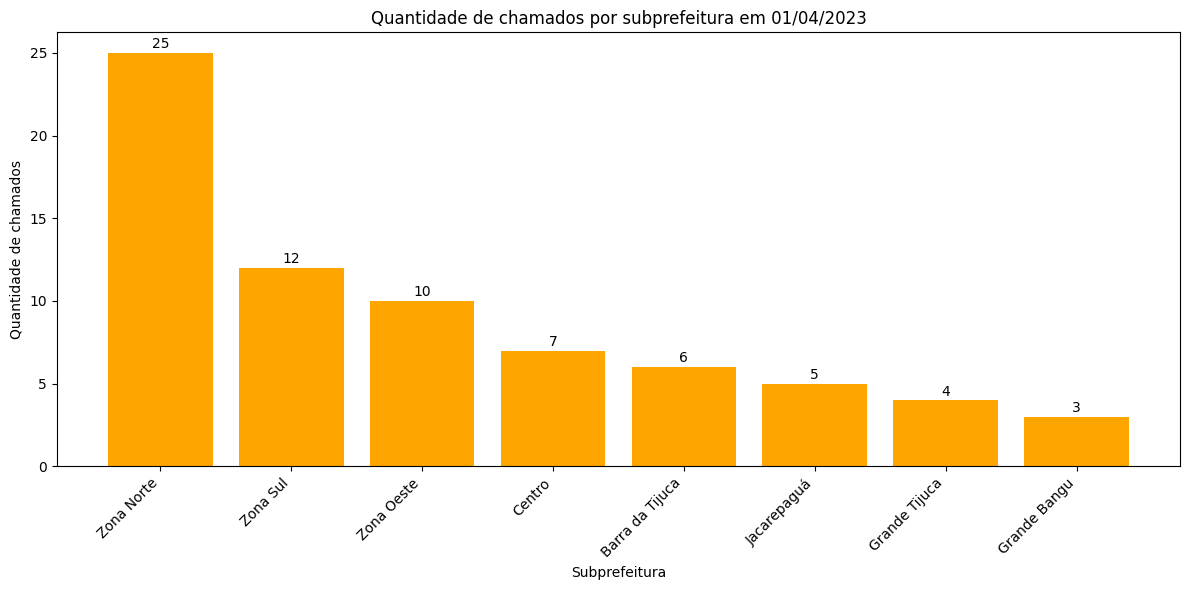

In [40]:
total_chamados_por_subprefeitura = total_chamados_por_subprefeitura.sort_values(by='total_chamados', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(total_chamados_por_subprefeitura['subprefeitura'], total_chamados_por_subprefeitura['total_chamados'], color='orange')
plt.xlabel('Subprefeitura')
plt.ylabel('Quantidade de chamados')
plt.title('Quantidade de chamados por subprefeitura em 01/04/2023')


for i, value in enumerate(total_chamados_por_subprefeitura['total_chamados']):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')


plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## (Questão 4.1) Quais os tipos de chamados para cada subprefeitura nesse dia?

In [41]:
df_combinado = pd.merge(chamados_01_04_2023, df_bairros, how='inner', left_on='id_bairro', right_on='id_bairro')

total_chamados_por_tipo_subprefeitura = df_combinado.groupby(['subprefeitura', 'tipo']).size().reset_index(name='total_chamados')

total_chamados_por_tipo_subprefeitura = total_chamados_por_tipo_subprefeitura.sort_values(by=['subprefeitura', 'tipo', 'total_chamados'])

print(total_chamados_por_tipo_subprefeitura)


      subprefeitura                      tipo  total_chamados
0   Barra da Tijuca  Estacionamento Irregular               3
1   Barra da Tijuca           Poluição sonora               2
2   Barra da Tijuca  Programa Cegonha Carioca               1
3            Centro        Comércio ambulante               1
4            Centro  Estacionamento Irregular               1
5            Centro                    Feiras               1
6            Centro  Ocupação de área pública               1
7            Centro           Poluição sonora               3
8      Grande Bangu                   Limpeza               1
9      Grande Bangu  Ocupação de área pública               1
10     Grande Bangu                  Semáforo               1
11    Grande Tijuca        Iluminação Pública               1
12    Grande Tijuca                   Limpeza               1
13    Grande Tijuca              Pavimentação               1
14    Grande Tijuca          Remoção Gratuita               1
15      

## (Questão 4.2)  Qual o chamado mais frequente nesse dia para cada subprefeitura?

In [42]:
df_combinado = pd.merge(chamados_01_04_2023, df_bairros, how='inner', left_on='id_bairro', right_on='id_bairro')

total_chamados_por_tipo_subprefeitura = df_combinado.groupby(['subprefeitura', 'tipo']).size().reset_index(name='total_chamados')

idx = total_chamados_por_tipo_subprefeitura.groupby(['subprefeitura'])['total_chamados'].transform(max) == total_chamados_por_tipo_subprefeitura['total_chamados']
tipos_mais_frequentes_por_subprefeitura = total_chamados_por_tipo_subprefeitura[idx]

print(tipos_mais_frequentes_por_subprefeitura[['subprefeitura', 'tipo', 'total_chamados']])


      subprefeitura                      tipo  total_chamados
0   Barra da Tijuca  Estacionamento Irregular               3
7            Centro           Poluição sonora               3
8      Grande Bangu                   Limpeza               1
9      Grande Bangu  Ocupação de área pública               1
10     Grande Bangu                  Semáforo               1
11    Grande Tijuca        Iluminação Pública               1
12    Grande Tijuca                   Limpeza               1
13    Grande Tijuca              Pavimentação               1
14    Grande Tijuca          Remoção Gratuita               1
15      Jacarepaguá        Iluminação Pública               3
26       Zona Norte           Poluição sonora               6
34       Zona Oeste           Poluição sonora               3
36         Zona Sul           Poluição sonora              10


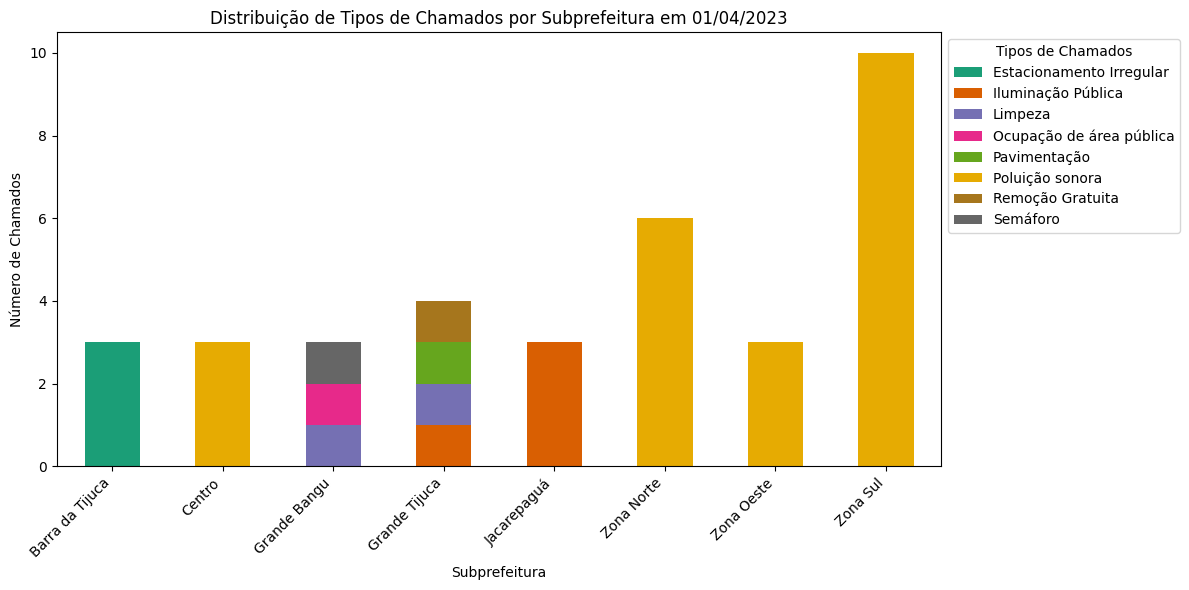

In [43]:
pivot_data = tipos_mais_frequentes_por_subprefeitura.pivot_table(index='subprefeitura', columns='tipo', values='total_chamados', fill_value=0)

plt.figure(figsize=(12, 6))
ax = pivot_data.plot(kind='bar', stacked=True, colormap='Dark2', ax=plt.gca())  # Troquei o colormap para 'Dark2'

plt.xlabel('Subprefeitura')
plt.ylabel('Número de Chamados')
plt.title('Distribuição de Tipos de Chamados por Subprefeitura em 01/04/2023')
plt.xticks(rotation=45, ha='right')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1), title='Tipos de Chamados')
plt.tight_layout()
plt.show()


## (Questão 5) Existe algum chamado aberto nesse dia que não foi associado a um bairro ou subprefeitura na tabela de bairros? Se sim, por que isso acontece?

In [44]:
pd.set_option('display.max_colwidth', None)

df_combinado = pd.merge(chamados_01_04_2023, df_bairros, how='left', left_on='id_bairro', right_on='id_bairro')

chamados_sem_associacao = df_combinado[df_combinado['nome'].isnull() | df_combinado['subprefeitura'].isnull()]

print(chamados_sem_associacao[['tipo', 'subtipo']])


     tipo                                              subtipo
4  Ônibus  Verificação de ar condicionado inoperante no ônibus


A reclamação sobre o ar condicionado em um ônibus, aberta no dia específico, não está associada a uma subprefeitura ou bairro, devido à mobilidade dos ônibus, que não estão rigidamente vinculados a uma localização fixa. A mobilidade dos ônibus dificulta a categorização geográfica.

## (Questão 6) Quantos chamados com o subtipo "Perturbação do sossego" foram abertos desde 01/01/2022 até 31/12/2023 (incluindo extremidades)?


In [45]:
filtro_perturbacao_sossego = (
    (df_chamados_2022_2024['subtipo'] == 'Perturbação do sossego') &
    (df_chamados_2022_2024['data_inicio'] >= '2022-01-01') &
    (df_chamados_2022_2024['data_inicio'] <= '2023-12-31')
)

total_chamados_perturbacao_sossego = df_chamados_2022_2024[filtro_perturbacao_sossego].shape[0]

print(f"Total de chamados com subtipo 'Perturbação do sossego' no intervalo de '2022-01-01' a '2023-12-31': {total_chamados_perturbacao_sossego}")

Total de chamados com subtipo 'Perturbação do sossego' no intervalo de '2022-01-01' a '2023-12-31': 42408


## (Questão 6.1) Quais são os 15 bairros que apresentam a maior quantidade desse tipo de chamado durante este período?

Top 15 bairros com mais chamados do subtipo 'Perturbação do sossego' no intervalo de '2022-01-01' a '2023-12-31':
                         nome  total_chamados_perturbacao_sossego
35                 Copacabana                                2791
14                   Botafogo                                2135
142                    Tijuca                                2042
8             Barra da Tijuca                                1865
21               Campo Grande                                1682
27                     Centro                                1568
143           Todos os Santos                                1405
154               Vila Isabel                                1269
119  Recreio dos Bandeirantes                                1251
83                     Leblon                                1165
129              Santa Teresa                                1010
67                    Ipanema                                 879
140                   Taquar

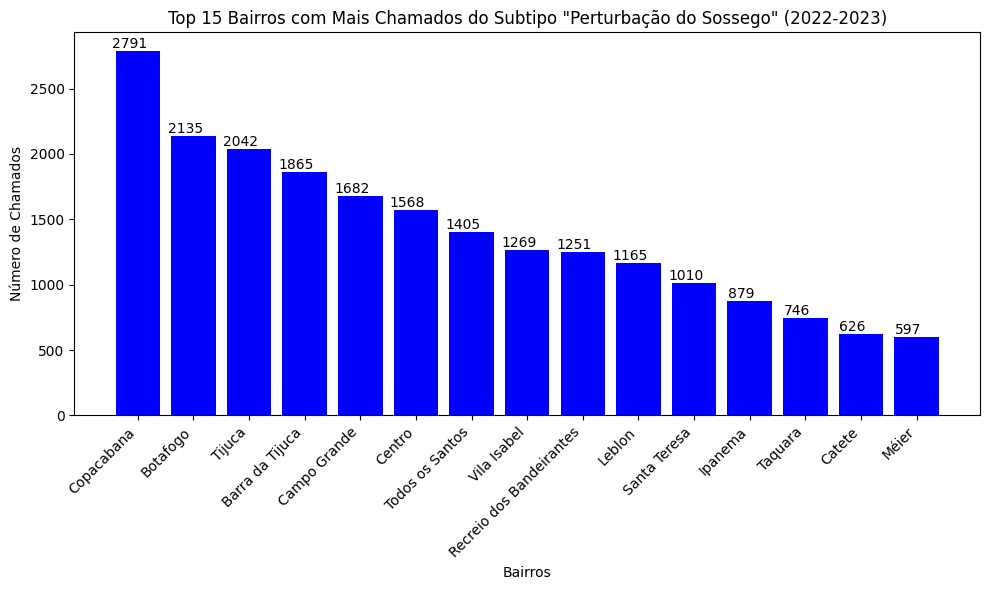

In [46]:
filtro_perturbacao_sossego = (
    (df_chamados_2022_2024['subtipo'] == 'Perturbação do sossego') &
    (df_chamados_2022_2024['data_inicio'] >= '2022-01-01') &
    (df_chamados_2022_2024['data_inicio'] <= '2023-12-31')
)

chamados_perturbacao_sossego = df_chamados_2022_2024[filtro_perturbacao_sossego]

df_combinado = pd.merge(chamados_perturbacao_sossego, df_bairros, how='inner', left_on='id_bairro', right_on='id_bairro')

total_chamados_por_bairro = df_combinado.groupby('nome')['id_bairro'].count().reset_index(name='total_chamados_perturbacao_sossego')

total_chamados_por_bairro = total_chamados_por_bairro.sort_values(by='total_chamados_perturbacao_sossego', ascending=False)

top_15_bairros = total_chamados_por_bairro.head(15)
print("Top 15 bairros com mais chamados do subtipo 'Perturbação do sossego' no intervalo de '2022-01-01' a '2023-12-31':")
print(top_15_bairros[['nome', 'total_chamados_perturbacao_sossego']])

print('\n')

plt.figure(figsize=(10, 6))
bars = plt.bar(top_15_bairros['nome'], top_15_bairros['total_chamados_perturbacao_sossego'], color='blue')
plt.xlabel('Bairros')
plt.ylabel('Número de Chamados')
plt.title('Top 15 Bairros com Mais Chamados do Subtipo "Perturbação do Sossego" (2022-2023)')
plt.xticks(rotation=45, ha='right')

for bar, valor in zip(bars, top_15_bairros['total_chamados_perturbacao_sossego']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.05, f'{valor}', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


## (Questão 6.2) Qual a subprefeitura com mais chamados desse tipo nesse intervalo de tempo?

Subprefeitura com mais chamados do subtipo 'Perturbação do sossego' no intervalo de '2022-01-01' a '2023-12-31': Zona Norte com 10447 chamados.




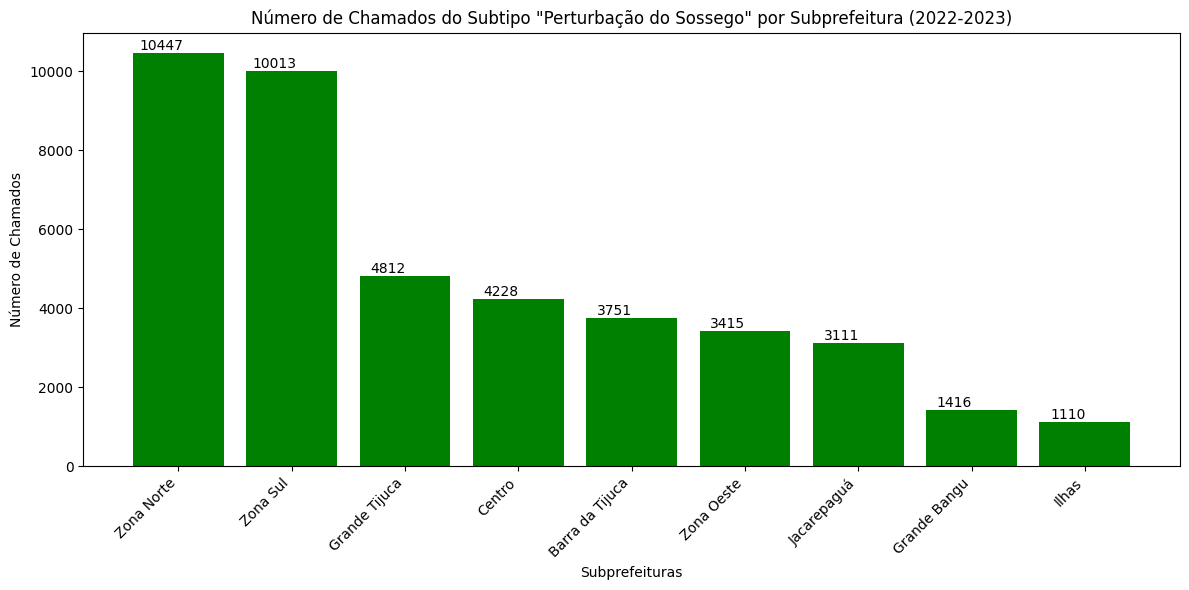

In [47]:
filtro_perturbacao_sossego = (
    (df_chamados_2022_2024['subtipo'] == 'Perturbação do sossego') &
    (df_chamados_2022_2024['data_inicio'] >= '2022-01-01') &
    (df_chamados_2022_2024['data_inicio'] <= '2023-12-31')
)


chamados_perturbacao_sossego = df_chamados_2022_2024[filtro_perturbacao_sossego]


df_combinado = pd.merge(chamados_perturbacao_sossego, df_bairros, how='inner', left_on='id_bairro', right_on='id_bairro')

total_chamados_por_subprefeitura = df_combinado.groupby('subprefeitura')['id_bairro'].count().reset_index(name='total_chamados_perturbacao_sossego')

subprefeitura_mais_chamados = total_chamados_por_subprefeitura.loc[total_chamados_por_subprefeitura['total_chamados_perturbacao_sossego'].idxmax()]

print(f"Subprefeitura com mais chamados do subtipo 'Perturbação do sossego' no intervalo de '2022-01-01' a '2023-12-31': {subprefeitura_mais_chamados['subprefeitura']} com {subprefeitura_mais_chamados['total_chamados_perturbacao_sossego']} chamados.")

print('\n')

total_chamados_por_subprefeitura = total_chamados_por_subprefeitura.sort_values(by='total_chamados_perturbacao_sossego', ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(total_chamados_por_subprefeitura['subprefeitura'], total_chamados_por_subprefeitura['total_chamados_perturbacao_sossego'], color='green')
plt.xlabel('Subprefeituras')
plt.ylabel('Número de Chamados')
plt.title('Número de Chamados do Subtipo "Perturbação do Sossego" por Subprefeitura (2022-2023)')
plt.xticks(rotation=45, ha='right')

for bar, valor in zip(bars, total_chamados_por_subprefeitura['total_chamados_perturbacao_sossego']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.05, f'{valor}', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

## (Questão 7) Selecione os chamados com esse subtipo que foram abertos durante os eventos contidos na tabela de eventos (Reveillon, Carnaval e Rock in Rio).

In [48]:
filtro_perturbacao_sossego = df_chamados_2022_2024['subtipo'] == 'Perturbação do sossego'
df_chamados_filtrados = df_chamados_2022_2024[filtro_perturbacao_sossego]

total_chamados = 0

for _, chamado in df_chamados_filtrados.iterrows():
    data_inicio_chamado = chamado['data_inicio']
    for _, evento in df_eventos.iterrows():
        if evento['data_inicial'] <= data_inicio_chamado <= evento['data_final']:
            total_chamados += 1
            break

print(f"Total de chamados com subtipo 'Perturbação do sossego' durante os eventos': {total_chamados}")


Total de chamados com subtipo 'Perturbação do sossego' durante os eventos': 1212


## (Questão 8) Quantos chamados desse subtipo foram abertos em cada evento?

Total de chamados com subtipo 'Perturbação do sossego' durante o evento 'Rock in Rio': 834
Total de chamados com subtipo 'Perturbação do sossego' durante o evento 'Reveillon': 137
Total de chamados com subtipo 'Perturbação do sossego' durante o evento 'Carnaval': 241




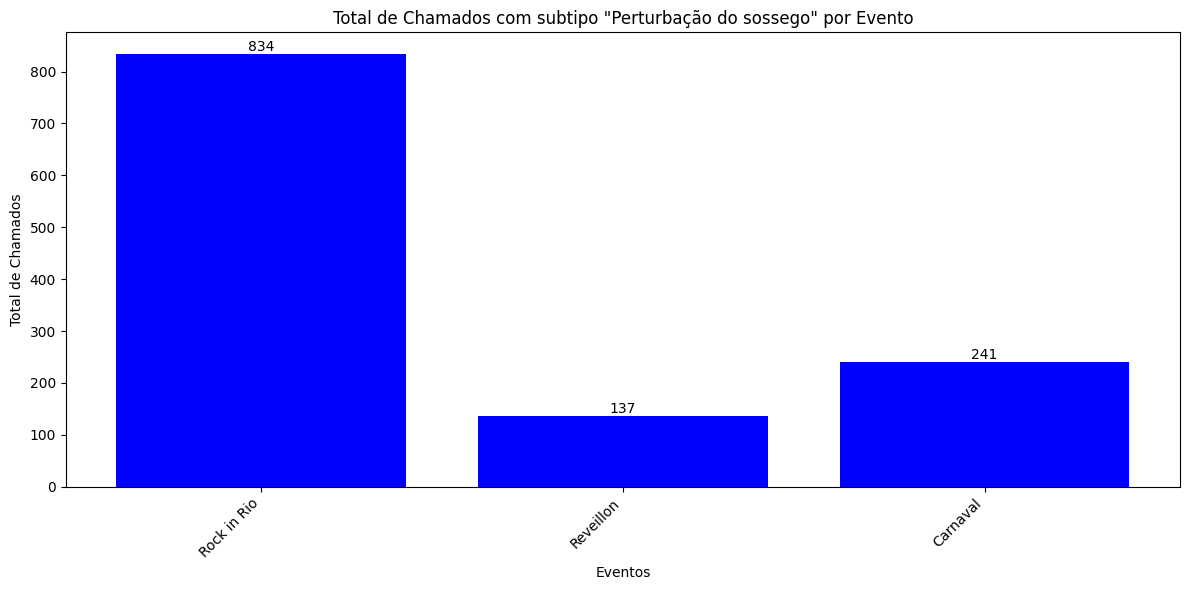

In [49]:
filtro_perturbacao_sossego = df_chamados_2022_2024['subtipo'] == 'Perturbação do sossego'
df_chamados_filtrados = df_chamados_2022_2024[filtro_perturbacao_sossego]

chamados_por_evento = {}

for _, chamado in df_chamados_filtrados.iterrows():
    data_inicio_chamado = chamado['data_inicio']
    for _, evento in df_eventos.iterrows():
        if evento['data_inicial'] <= data_inicio_chamado <= evento['data_final']:
            if evento['evento'] in chamados_por_evento:
                chamados_por_evento[evento['evento']] += 1
            else:
                chamados_por_evento[evento['evento']] = 1
            break

for evento, total_chamados in chamados_por_evento.items():
    print(f"Total de chamados com subtipo 'Perturbação do sossego' durante o evento '{evento}': {total_chamados}")

print("\n")

eventos = list(chamados_por_evento.keys())
total_chamados = list(chamados_por_evento.values())

plt.figure(figsize=(12, 6))
bars = plt.bar(eventos, total_chamados, color='blue')
plt.xlabel('Eventos')
plt.ylabel('Total de Chamados')
plt.title('Total de Chamados com subtipo "Perturbação do sossego" por Evento')
plt.xticks(rotation=45, ha='right')

for bar, valor in zip(bars, total_chamados):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f'{valor}', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


## (Questão 8.1) Em qual período de tempo ocorre a maior quantidade de chamados desse tipo durante cada evento, considerando dois intervalos: das 18h às 6h e das 6h às 18h?

Resultados para o intervalo da noite (das 18:00 às 6:00):
Total de chamados com subtipo 'Perturbação do sossego' durante o evento 'Rock in Rio' na noite: 578
Total de chamados com subtipo 'Perturbação do sossego' durante o evento 'Reveillon' na noite: 86
Total de chamados com subtipo 'Perturbação do sossego' durante o evento 'Carnaval' na noite: 142

Resultados para o intervalo do dia (das 6:00 às 18:00):
Total de chamados com subtipo 'Perturbação do sossego' durante o evento 'Rock in Rio' no dia: 256
Total de chamados com subtipo 'Perturbação do sossego' durante o evento 'Reveillon' no dia: 51
Total de chamados com subtipo 'Perturbação do sossego' durante o evento 'Carnaval' no dia: 99




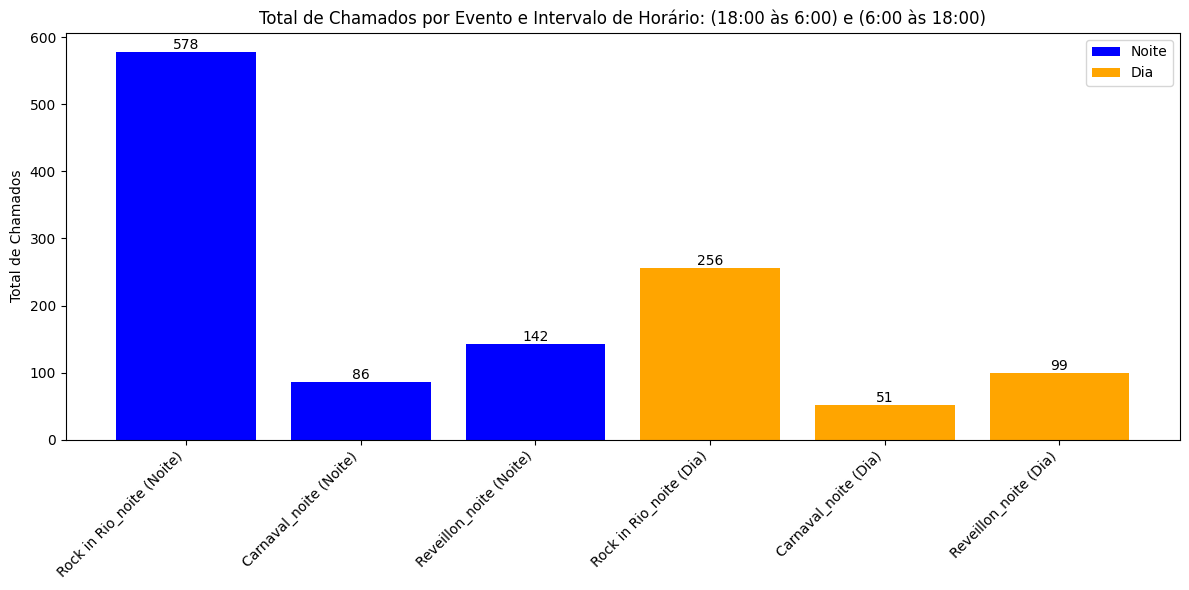

In [50]:
filtro_perturbacao_sossego = df_chamados_2022_2024['subtipo'] == 'Perturbação do sossego'
df_chamados_filtrados = df_chamados_2022_2024[filtro_perturbacao_sossego]

chamados_por_evento_horario_noite = {}
chamados_por_evento_horario_dia = {}

for _, chamado in df_chamados_filtrados.iterrows():
    data_inicio_chamado = chamado['data_inicio']
    hora_chamado = data_inicio_chamado.hour

    if 18 <= hora_chamado or hora_chamado < 6:
        intervalo = 'noite'
    else:
        intervalo = 'dia'

    for _, evento in df_eventos.iterrows():
        if evento['data_inicial'] <= data_inicio_chamado <= evento['data_final']:
            chave_evento_horario = f"{evento['evento']}_{intervalo}"

            if intervalo == 'noite':
                if chave_evento_horario in chamados_por_evento_horario_noite:
                    chamados_por_evento_horario_noite[chave_evento_horario] += 1
                else:
                    chamados_por_evento_horario_noite[chave_evento_horario] = 1
            else:
                if chave_evento_horario in chamados_por_evento_horario_dia:
                    chamados_por_evento_horario_dia[chave_evento_horario] += 1
                else:
                    chamados_por_evento_horario_dia[chave_evento_horario] = 1
            break

print("Resultados para o intervalo da noite (das 18:00 às 6:00):")
for chave, total_chamados in chamados_por_evento_horario_noite.items():
    evento = chave.split('_')[0]
    print(f"Total de chamados com subtipo 'Perturbação do sossego' durante o evento '{evento}' na noite: {total_chamados}")

print("\nResultados para o intervalo do dia (das 6:00 às 18:00):")
for chave, total_chamados in chamados_por_evento_horario_dia.items():
    evento = chave.split('_')[0]
    print(f"Total de chamados com subtipo 'Perturbação do sossego' durante o evento '{evento}' no dia: {total_chamados}")

print('\n')


eventos = list(chamados_por_evento_horario_noite.keys())
total_chamados_noite = list(chamados_por_evento_horario_noite.values())
total_chamados_dia = list(chamados_por_evento_horario_dia.values())

total_chamados = [noite + dia for noite, dia in zip(total_chamados_noite, total_chamados_dia)]

eventos_ordenados = sorted(zip(eventos, total_chamados), key=lambda x: x[1], reverse=True)

eventos_ordenados, total_chamados_ordenados = zip(*eventos_ordenados)

fig, ax = plt.subplots(figsize=(12, 6))
bars_noite = ax.bar([f'{evento} (Noite)' for evento in eventos_ordenados], total_chamados_noite, color='blue', label='Noite')
bars_dia = ax.bar([f'{evento} (Dia)' for evento in eventos_ordenados], total_chamados_dia, color='orange', label='Dia')

for bars, total_chamados in zip([bars_noite, bars_dia], [total_chamados_noite, total_chamados_dia]):
    for bar, valor in zip(bars, total_chamados):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f'{valor}', ha='center', va='bottom', color='black')

ax.set_title('Total de Chamados por Evento e Intervalo de Horário: (18:00 às 6:00) e (6:00 às 18:00)')
ax.set_ylabel('Total de Chamados')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()



## (Questão 9) Qual evento teve a maior média diária de chamados abertos desse subtipo?

Média diária de chamados para 'Rock in Rio': 119.14
Média diária de chamados para 'Reveillon': 45.67
Média diária de chamados para 'Carnaval': 60.25
O evento com a maior média diária de chamados é 'Rock in Rio' com uma média de 119.14 chamados por dia.




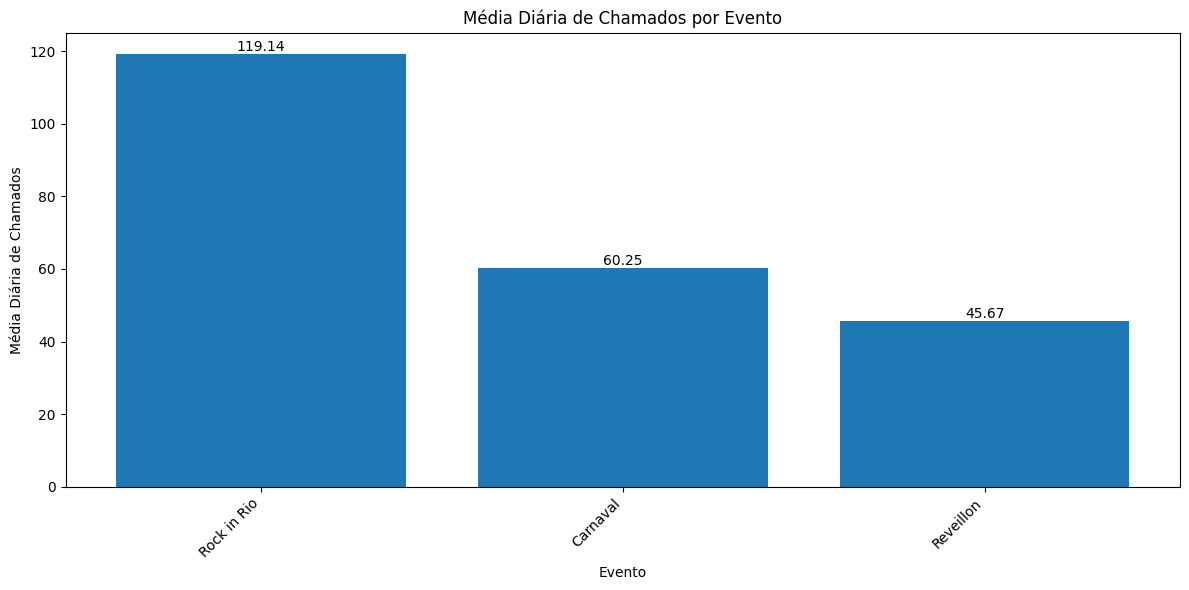

In [51]:
chamados_por_evento = {}
dias_com_chamados_por_evento = {}

for _, chamado in df_chamados_filtrados.iterrows():
    data_inicio_chamado = chamado['data_inicio']
    for _, evento in df_eventos.iterrows():
        if evento['data_inicial'] <= data_inicio_chamado <= evento['data_final']:
            if evento['evento'] in chamados_por_evento:
                chamados_por_evento[evento['evento']] += 1
                dias_com_chamados_por_evento[evento['evento']].add(data_inicio_chamado.date())
            else:
                chamados_por_evento[evento['evento']] = 1
                dias_com_chamados_por_evento[evento['evento']] = {data_inicio_chamado.date()}
            break

df_medias_diarias = pd.DataFrame(columns=['Evento', 'Média Diária'])

evento_com_maior_media = None
maior_media = 0
for evento, total_chamados in chamados_por_evento.items():
    total_dias = len(dias_com_chamados_por_evento[evento])
    media_diaria = total_chamados / total_dias
    df_medias_diarias = df_medias_diarias.append({'Evento': evento, 'Média Diária': media_diaria}, ignore_index=True)

    if media_diaria > maior_media:
        maior_media = media_diaria
        evento_com_maior_media = evento

for _, row in df_medias_diarias.iterrows():
    print(f"Média diária de chamados para '{row['Evento']}': {row['Média Diária']:.2f}")

print(f"O evento com a maior média diária de chamados é '{evento_com_maior_media}' com uma média de {maior_media:.2f} chamados por dia.")

print('\n')

df_medias_diarias = df_medias_diarias.sort_values(by='Média Diária', ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(df_medias_diarias['Evento'], df_medias_diarias['Média Diária'])
plt.xlabel('Evento')
plt.ylabel('Média Diária de Chamados')
plt.title('Média Diária de Chamados por Evento')

for bar, valor in zip(bars, df_medias_diarias['Média Diária']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f'{valor:.2f}', ha='center', va='bottom', color='black')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



## (Questão 10) Compare as médias diárias de chamados abertos desse subtipo durante os eventos específicos (Reveillon, Carnaval e Rock in Rio) e a média diária de chamados abertos desse subtipo considerando todo o período de 01/01/2022 até 31/12/2023.

Médias diárias de chamados por evento:
Média diária de chamados para 'Rock in Rio': 119.14
Média diária de chamados para 'Reveillon': 45.67
Média diária de chamados para 'Carnaval': 60.25
Média diária de chamados para o período de 01/01/2022 a 31/12/2023: 58.09




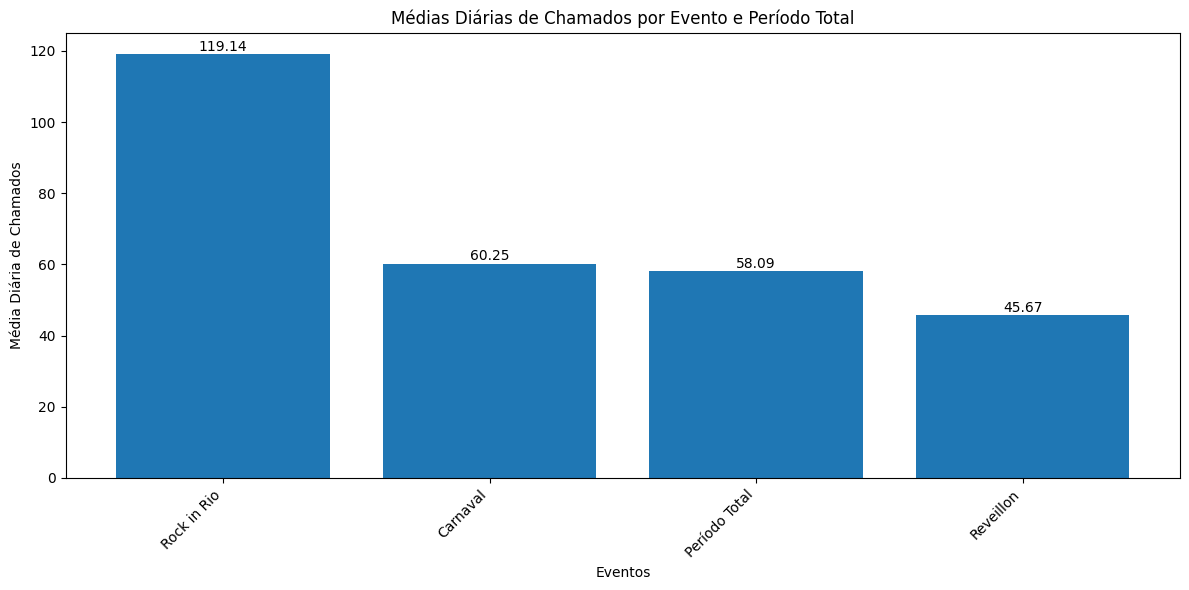

In [52]:
chamados_por_evento = {}
dias_com_chamados_por_evento = {}

for _, chamado in df_chamados_filtrados.iterrows():
    data_inicio_chamado = chamado['data_inicio']
    for _, evento in df_eventos.iterrows():
        if evento['data_inicial'] <= data_inicio_chamado <= evento['data_final']:
            if evento['evento'] in chamados_por_evento:
                chamados_por_evento[evento['evento']]['total_chamados'] += 1
                if evento['evento'] not in dias_com_chamados_por_evento:
                    dias_com_chamados_por_evento[evento['evento']] = set()
                dias_com_chamados_por_evento[evento['evento']].add(data_inicio_chamado.date())
            else:
                chamados_por_evento[evento['evento']] = {'total_chamados': 1}
                dias_com_chamados_por_evento[evento['evento']] = {data_inicio_chamado.date()}
            break

for evento, info in chamados_por_evento.items():
    total_dias = len(dias_com_chamados_por_evento[evento])
    total_chamados = info['total_chamados']
    media_diaria = total_chamados / total_dias if total_dias > 0 else 0
    info['media_diaria'] = media_diaria

total_dias_periodo = (pd.to_datetime('2023-12-31') - pd.to_datetime('2022-01-01')).days + 1
total_chamados_periodo = len(df_chamados_filtrados)
media_diaria_periodo = total_chamados_periodo / total_dias_periodo if total_dias_periodo > 0 else 0

print("Médias diárias de chamados por evento:")
for evento, info in chamados_por_evento.items():
    media_diaria = info['media_diaria']
    print(f"Média diária de chamados para '{evento}': {media_diaria:.2f}")

print(f"Média diária de chamados para o período de 01/01/2022 a 31/12/2023: {media_diaria_periodo:.2f}")

print('\n')

eventos = list(chamados_por_evento.keys())
medias_diarias = [info['media_diaria'] for info in chamados_por_evento.values()]

eventos.append('Período Total')
medias_diarias.append(media_diaria_periodo)

sorted_indices = sorted(range(len(medias_diarias)), key=lambda k: medias_diarias[k], reverse=True)
eventos = [eventos[i] for i in sorted_indices]
medias_diarias = [medias_diarias[i] for i in sorted_indices]

plt.figure(figsize=(12, 6))
bars = plt.bar(eventos, medias_diarias)
plt.xlabel('Eventos')
plt.ylabel('Média Diária de Chamados')
plt.title('Médias Diárias de Chamados por Evento e Período Total')
plt.xticks(rotation=45, ha='right')

for bar, valor in zip(bars, medias_diarias):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f'{valor:.2f}', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

